# work flow on ZTF Ia-cms objects

### import packages

In [1]:
import sys
sys.path.append('../sdapy')
from ztfanalysis import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.cosmology import Planck13 as cosmo
from filters import *

### ZTF names for the project

In [2]:
snlist = ['ZTF18aaykjei', 'ZTF18abuatfp', 'ZTF18actuhrs',
          'ZTF19aaeoqst', 'ZTF19abidbqp', 'ZTF19acbjddp',
          'ZTF20abmlxrx', 'ZTF20abqkbfx', 'ZTF20accmutv',
          'ZTF20aciwcuz', 'ZTF20acqikeh', 'ZTF21aaabwzx',]

### fun ztfmultiple to parse meta from bts catalog

In [3]:
ztfpm = ztfmultiple(metafile='rcf_query.txt', 
                    datafile='%s_data.clf',
                    parfile='priors.txt',
                    datadir='/Users/yash0613/Desktop/singleobj_study/ztficbl/',
                    skiprows=[], )
ztfpm.parse_meta(syntax='ZTFID in %s'%snlist)
ztfpm.format_meta()  

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


meta 12 objs


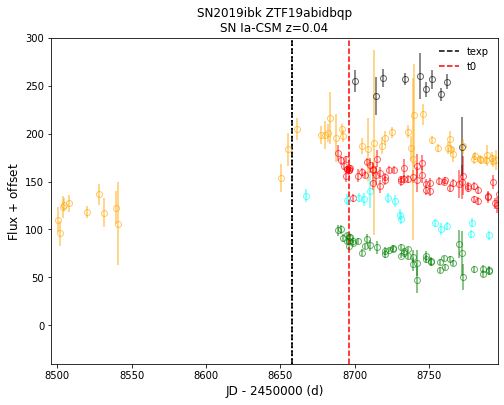

In [25]:
par = {
    'plot_bands': ['r','g','i', 'c','o'],
    'ax_xlim': [-200,100],
    'ax_ylim': [-40,300],
    'pl_type': 0,
    'pl_bands': ['o','r','g', 'i'],
    'nsteps': 40000,
    'nsteps_burnin': 20000,
    'rel_flux_cutoff': .4,
    'verbose': True,
    'nwalkers'  : 50,
    'tm_pl': 100,
    #'gp_fitr': [-100,100],
    #'gp_plotr': [-100,100],
}
nsn=11
ztfp = ztfsingle(ztfid=ztfpm.meta.iloc[nsn]._name, iauid=ztfpm.meta.iloc[nsn]['IAUID'], 
                 z=ztfpm.meta.iloc[nsn]['redshift'], dm=ztfpm.meta.iloc[nsn]['dm'], 
                 mkwebv=ztfpm.meta.iloc[nsn]['ebv'], sntype='SN Ia-CSM', 
                 ra=ztfpm.meta.iloc[nsn]['RA'], dec=ztfpm.meta.iloc[nsn]['Dec'], 
                 jdpeak=ztfpm.meta.iloc[nsn]['peakt']+2458000, **par)

if False:
    ztfp.query_fp_atlas(wdir='/Users/yash0613/Desktop/scripts/sn_data_analysis/sdapy/',
                    clobber=True, verbose=True, mjdstart=58500, mjdend=58900)
if True:
    ztfp.get_fp_ztf()
    ztfp.get_fp_atlas(binDays=1, clobber=False, verbose=True)
    #ztfp.run_gp()
    #ztfp.set_t0_withgp() 
    ztfp.set_texp_midway()
    #ztfp.lc = ztfp.lc.query('eflux<10')
    if False:
        fig,ax=plt.subplots(1,1)
        ztfp.calibrate_baseline(ax=ax, key='fcqfid', source='ztffp',
                    xmin=-100, xmax=-20, ax_xlim=[250,300], ax_ylim=None)
    if True:
        ztfp.fig, ztfp.ax = plt.subplots(1,1)
        ztfp.explosion_pl(ext_filt=['r','g','i','o'],ext_num=10)
        ztfp.plot(figsize=(8,6))

In [26]:
ztfp.t0+ztfp.texp[0]-2400000.5, ztfp.texp[1]-ztfp.texp[0], ztfp.texp[1]-ztfp.texp[2]

(58654.60999999987, 2.989999999757856, -2.9900000002235174)

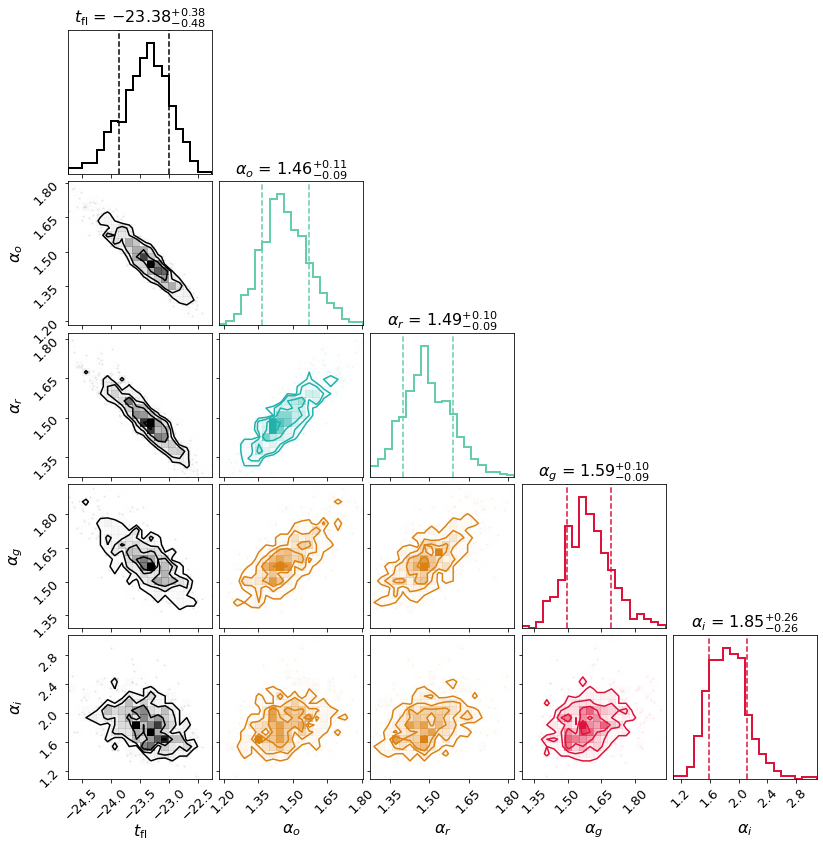

In [15]:
ztfp.corner(which='pl', limit=0.2)

  0%|          | 0/12 [00:02<?, ?it/s]

constrcut bolometric lc first


AssertionError: None

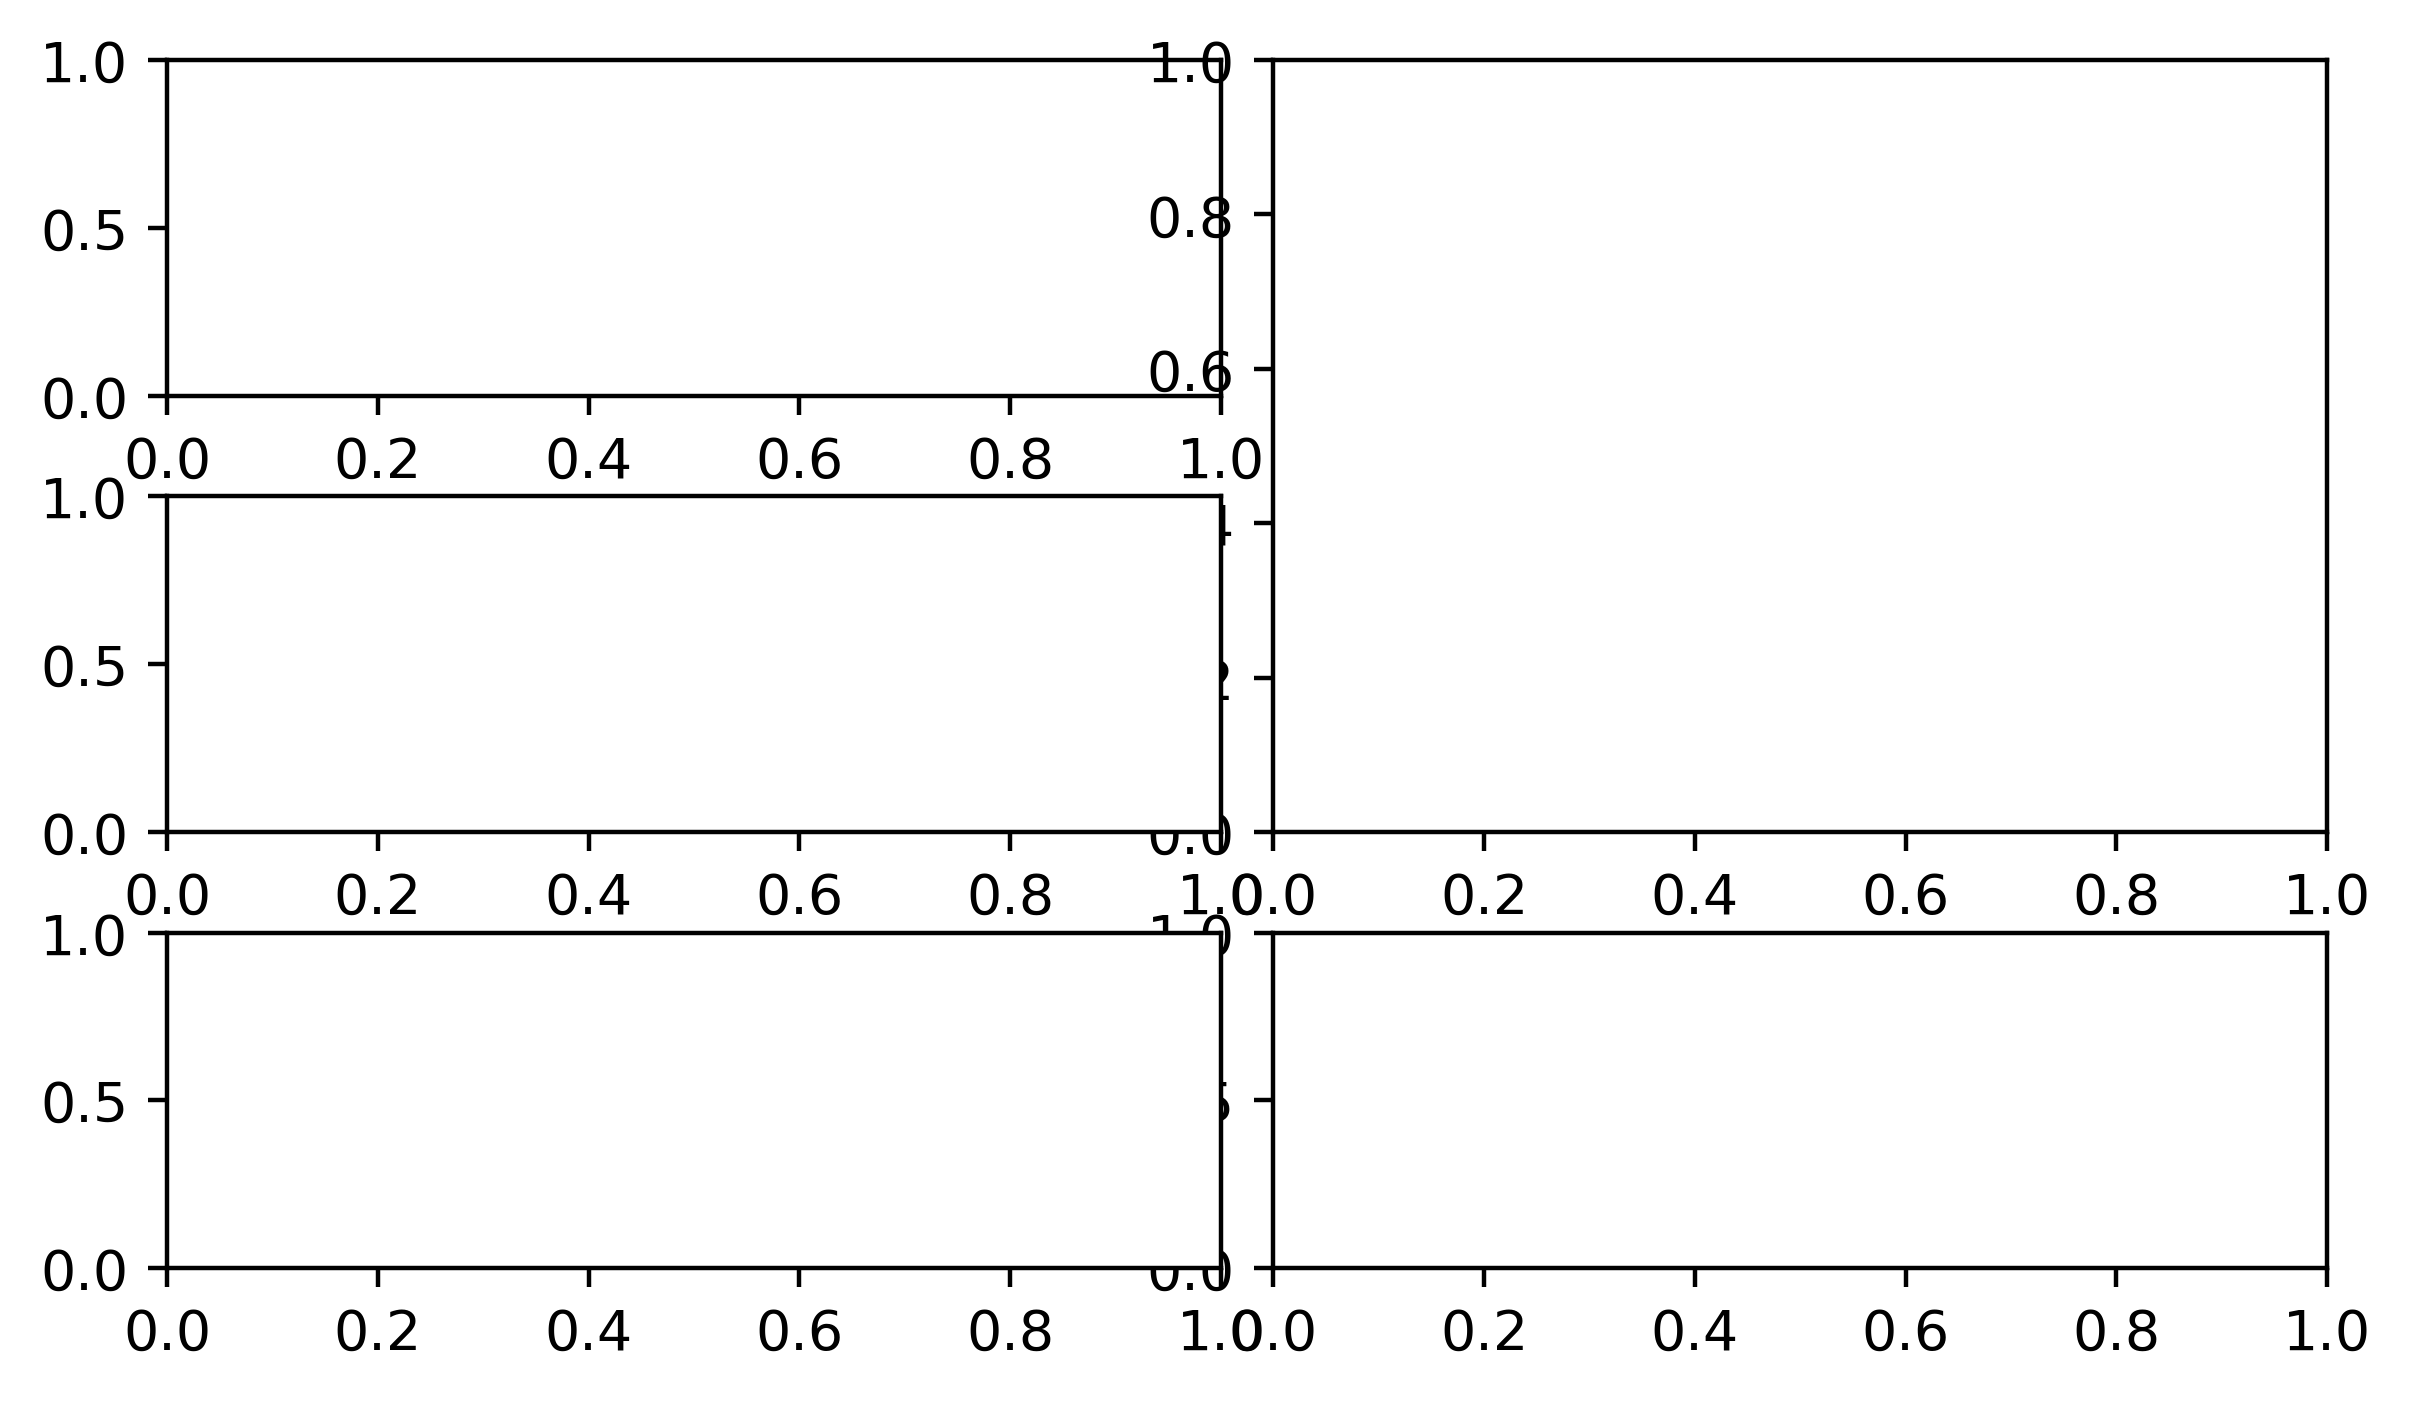

In [7]:
ztfpm.parse_params(force=True)
ztfpm.run(nsn=0, verbose=True, clobber=False, axes=None)